In [1]:
import geopandas as gpd
import geoplot as gplt

In [4]:
world = gpd.read_file('./50m_cultural/ne_50m_admin_0_countries_lakes.shp')
world = world.set_index('ADMIN')
len(world)

241

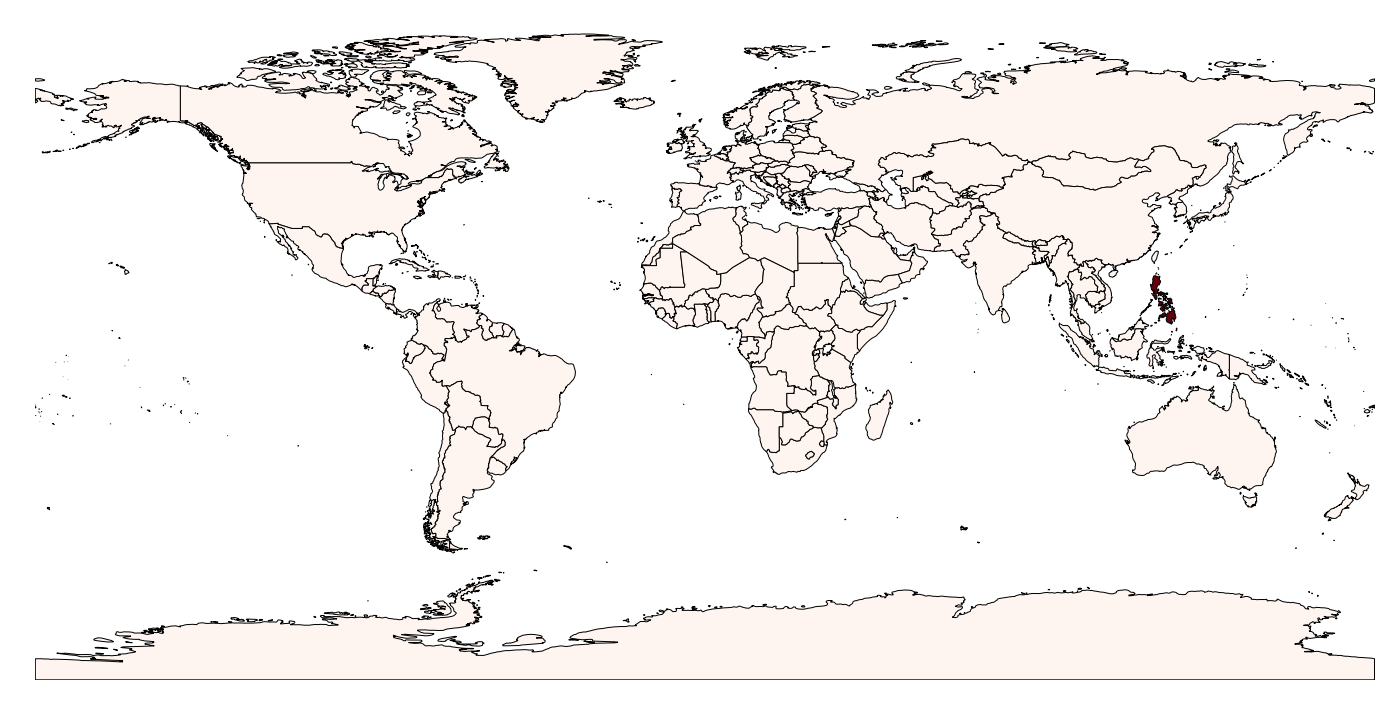

In [6]:
world['Read']=False
books_read=[
    'Philippines'
    
]

for book in books_read:
    world.at[book, 'Read'] = True
    
ax = gplt.choropleth(world,
                     hue='Read',
                     cmap='Reds',
                     figsize=(24,24))